In [8]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import json
import argparse
import spacy
from wordcloud import WordCloud
# import pdfkit
from bs4 import BeautifulSoup
import requests
import csv
import pymongo
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

In [9]:
myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["mydatabase"]
mycol = mydb["company1"]
mycol.drop()
mycol = mydb["company1"]


# argParser = argparse.ArgumentParser()
# argParser.add_argument("-n", "--name", help="your name")

# args = argParser.parse_args()
# print(args.name)

args = input("Enter company name: ")
print(args)

arg=[]
arg.append("https://newsapi.org/v2/everything?q="+args+"&from=2023-01-01&to=2023-01-12&sortBy=popularity&apiKey= ")

Wells Fargo


In [10]:
t=[]
u=[]
csvl=[]
for ar in arg:
    r = requests.get(ar)
    soup = BeautifulSoup(r.content, 'html5lib')
    d=r.json()
    # print(len(d))
    x=d["articles"]
    com=args.lower()
    # print("\n")
    for a in x:
        # print(a["description"])
        if a["title"] is not None:
            data=a["description"].lower()
        if com in data:
            csvl.append({'Title':a["description"],'URL':a["url"]})
            # print(a["title"])
            t.append(a["description"])
            u.append(a["url"])
            # print(a["url"])

In [11]:
nlp = spacy.load(r"./output/model-best")

my_list=[]

for i in range(len(t)):
    doc=nlp(t[i])
    spacy.displacy.render(doc, style="ent", jupyter=True)
    ll=[]
    for ent in doc.ents:
        my_list.append(ent.text)
        ll.append(ent.text)
    mydict = { "Title": t[i], "URL": u[i], "neg":ll}
    x=mycol.insert_one(mydict)
    # print(x)

c:\Users\vedant\AppData\Local\Programs\Python\Python310\lib\site-packages\spacy\displacy\__init__.py:206: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


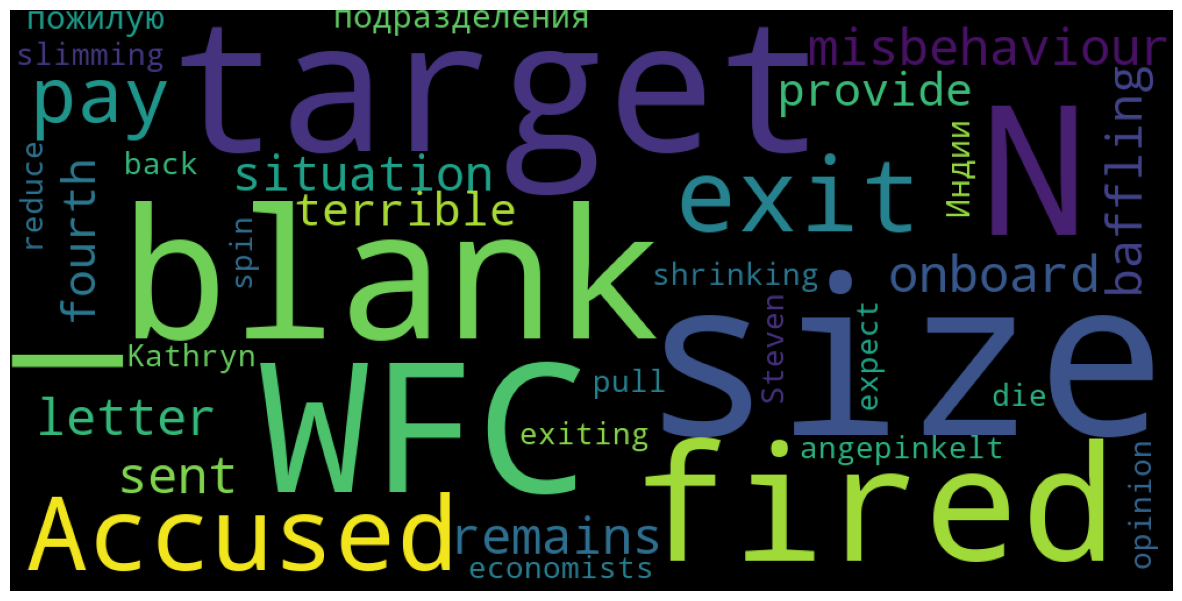

In [12]:
unique_string=(" ").join(my_list)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("cloud1"+".png", bbox_inches='tight')
plt.show()
plt.close()

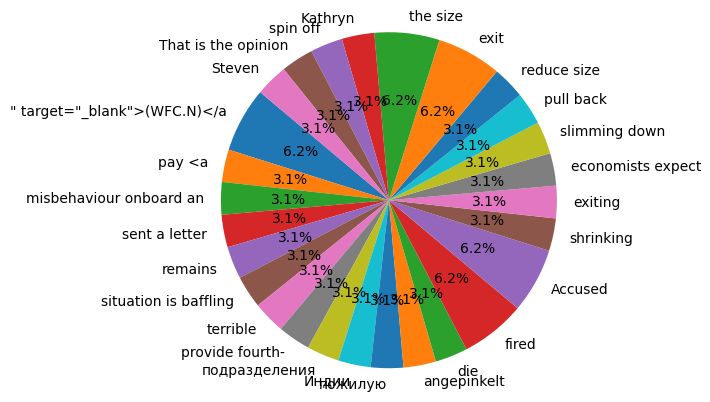

In [13]:
status_d=Counter(my_list)
#print(status_d)

key_list = list(status_d.keys())
val_list = list(status_d.values())

plt.pie(val_list, labels=key_list,
autopct='%1.1f%%', shadow=False, startangle=140)
plt.axis('equal')
plt.savefig('pie1.png',dpi=300)
plt.show()

mycol1 = mydb["company1t"]
mycol1.drop()
mycol1 = mydb["company1"]

for i in range(len(key_list)):
    mydict1 = { "Word": key_list[i], "Frequency": val_list[i]}
    x=mycol1.insert_one(mydict1)


#print(t)
#print(u)
df = {'Title':t,'URL':u}
#
#print(df)

file = open('geek.txt','w')
for i in range(1, len(df["URL"])):
   #print(df['URL'][i])
   file.write(f"{df['URL'][i]} \n")
file.close()


#df = csvl
df = pd.DataFrame({'Title':t,'URL':u})


df_info = ["Title", "URL"]

df.to_csv('news.csv', index=False, encoding='utf-8')

# with open('testcsv.csv', 'w') as csvfile:
#     writer = csv.DictWriter(csvfile, fieldnames = df_info)
#     writer.writeheader()
#     writer.writerows(df)


In [14]:
from fpdf import FPDF
  
pdf = FPDF()  
  
pdf.add_page()
  
pdf.set_font("Arial", size = 8)
 
f = open("links.txt", "r")
 
for x in f:
    pdf.cell(200, 10, txt = x, ln = 1, align = 'C')
  
pdf.output("Article_Links.pdf")  

''